<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0601/0601_07_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_Kmeans(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kmeans 

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Iris Dataset은 원래 label이 제공되지만, label이 없다고 가정하고 K-Mean 알고리즘으로 위 데이터를 그룹화 시켜봅시다. 

### 모델링

클러스터링 하려는 그룹의 수 k 를 지정해줘야 합니다. sklearn에서는 n_clusters 옵션으로 지정할 수 있습니다

In [2]:
from sklearn.cluster import KMeans

X = iris.data

# 모델 객체 생성
kmeans = KMeans(n_clusters=3, random_state = 19) 
#클러스터가 3개인 것을 알고 있어서 n_clusters=3
#n_clusters: 중심점 개수 

In [ ]:
X

In [3]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=19)

Kmeans를 수행한 다음 각 데이터를 그룹에 할당할 수 있습니다. 

In [4]:
kmeans.predict(X) #3개의 클러스터에 각각 들어가 있는 것을 볼 수 있음

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
irisDF
# cluster : 클러스드 할당
# 클러스트와 target 비교하면 몇개 잘못분류되어 있는 것 확인 가능

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852955
1,4.9,3.0,1.4,0.2,0,1,0.815495
2,4.7,3.2,1.3,0.2,0,1,0.829315
3,4.6,3.1,1.5,0.2,0,1,0.805014
4,5.0,3.6,1.4,0.2,0,1,0.849302
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,0.425136
146,6.3,2.5,5.0,1.9,2,0,0.104171
147,6.5,3.0,5.2,2.0,2,2,0.314930
148,6.2,3.4,5.4,2.3,2,2,0.352454


iris 데이터의 원래 그룹과 함께 비교해보면 아래처럼 클러스터가 배정되었습니다. 

In [20]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
# 원래 target인 애가 cluster에 어디 있는지 알 수 있음
print(iris_result)


target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 결과 시각화

결과를 시각화해봅시다. 

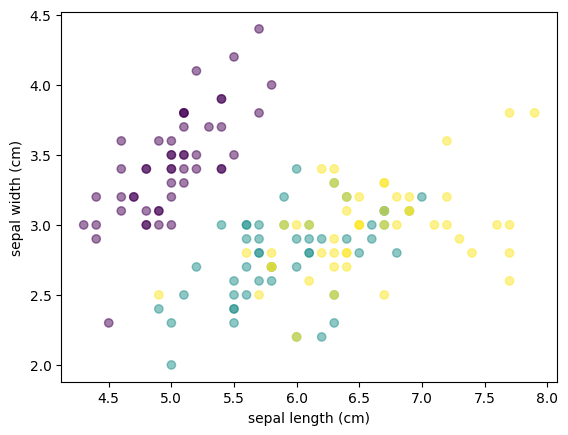

In [22]:
# 클러스터링 결과를 시각화합니다
x1 = X[:, 0]
x2 = X[:, 1]
plt.scatter(x1, x2, c=iris.target, alpha=0.5) #irls target으로 본 그래프
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

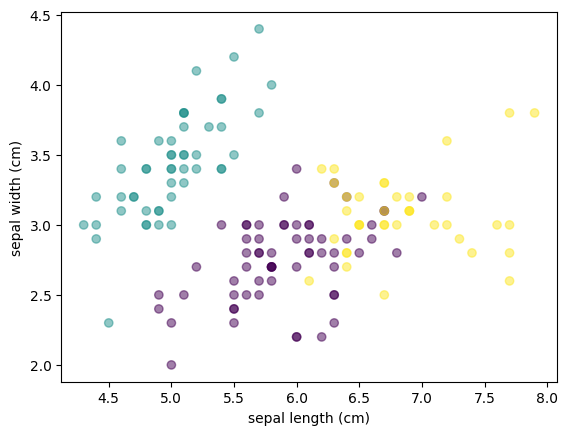

In [6]:
# 클러스터링 결과를 시각화합니다
x1 = X[:, 0]
x2 = X[:, 1]
plt.scatter(x1, x2, c=kmeans.labels_, alpha=0.5) # 클러스터로 본 그래프
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### 클러스터 개수 정하기

KMeans 객체는 내부적으로 .inertia_ 속성을 가지고 있습니다. 

 Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값입니다.   
 -> 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가합니다. 

In [23]:
model.inertia_ # 각 샘플별로 클러스터에 할당되어 있던 거리 = 응집도

30.254686147186156

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

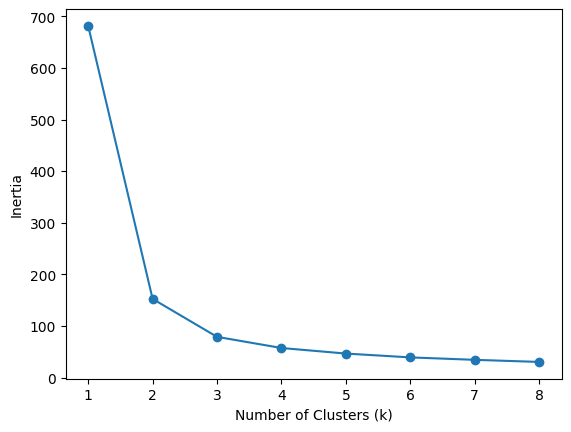

In [7]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다, k means를 1-8까지 순서대로 fitting 해보려고 함
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_) # 지표확인 시 inertia_ 지표확인하면서 움직이면 됩니다
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
# 그래프를 보니 3-5 사이 값이 안정적인 것을 볼 수 있음 >> 클러스트 3-5로 주는 것이 좋음

일반적으로 클러스터의 수가 증가할 수록 inertia는 감소하게 됩니다. 궁극적으로 클러스터의 수와 inertia간의 trade-off가 발생하게 됩니다. 우리의 목표는 inertia를 최소화 시키면서 동시에 클러스터의 수를 최소화 시키는 것입니다. 이 때 최적의 클러스터 수를 결정하는 한 가지 방법은 ‘elbow’ 메소드 입니다.

Elbow 메소드란 위 그래프를 사람의 팔로 간주하고, 팔꿈치 부분에 해당하는 클러스터 갯수를 선택하는 것을 말합니다. 즉 inertia가 감소하는 정도가 낮아지는 지점을 찾으면 됩니다. 위 그래프에서는 3 이 가장 최적의 클러스터의 수 라고 말할 수 있습니다.

### 평가

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [24]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
# 평가
from sklearn.metrics import silhouette_score # silhouette_score : 실루엣 지표
 
silhouette_score(X, kmeans.labels_, metric='euclidean') 
# x, 라벨(클러스터), 거리를 어떻게 잴지(metric=)를 넣어주면 된다,
# 1에 가까운 것이 좋지만 1에 가깝다고해서 다 좋은 모델은 아님

0.5528190123564095

In [9]:
from sklearn.metrics import silhouette_samples # 각각의 샘플의 실루엣계수 구해주는 라이브러리

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852955
1,4.9,3.0,1.4,0.2,0,1,0.815495
2,4.7,3.2,1.3,0.2,0,1,0.829315


In [ ]:
score_samples

In [26]:
irisDF.groupby('cluster').mean()['silhouette_coeff']
# 1번은 안정적(1에 가까움)이나 2,3번(숫자가 낮음)이 경계가 불분명한 것을 알 수 있음

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [10]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

1번 군집은 실루엣 계수 평균 값이 특히 높고, 0번과 2번은 상대적으로 낮은 값을 보입니다.

## 실습

In [14]:
# !gdown --id 18TLEN9Z17Fi2hdfuyfoR9fFEZ8nUuzLw

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18TLEN9Z17Fi2hdfuyfoR9fFEZ8nUuzLw
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 13.3MB/s]


In [15]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 새 섹션

위 데이터 중 Annual Income과 Spending Score 두 가지 컬럼을 바탕으로 고객들을 클러스터링 하세요

### 데이터 전처리

In [43]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화 진행
data_scale = MinMaxScaler().fit_transform(data)

In [39]:
data_scale

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

### 모델링

In [44]:
from sklearn.cluster import KMeans

# 원하는 클러스러 개수 선정
k = 3

# 그룹 수, random_state 설정
kmeans = KMeans(n_clusters=3, random_state = 19) 
# 정규화된 데이터에 학습
kmeans.fit(data_scale)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,6
197,198,Male,32,126,74,5
198,199,Male,32,137,18,6


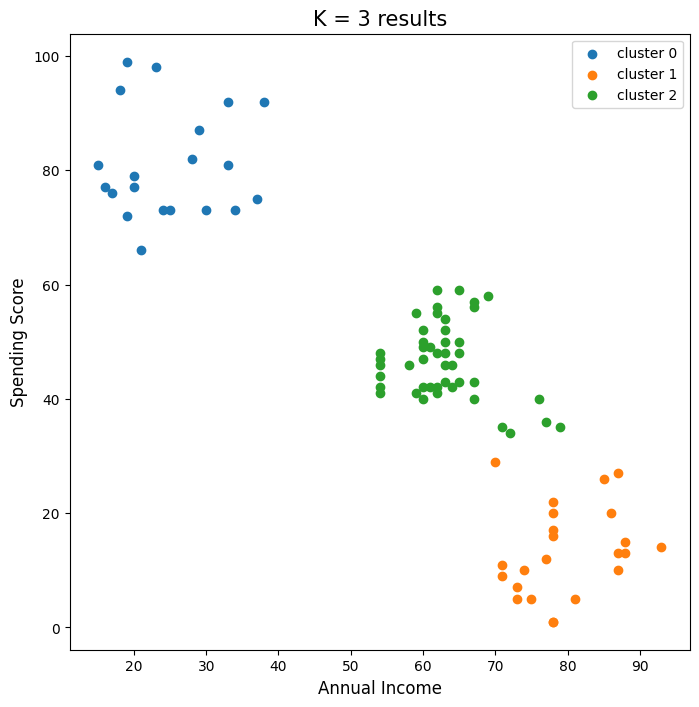

In [46]:
# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'], df.loc[df['cluster'] == i, 'Spending Score (1-100)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

#### k 결정 - elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

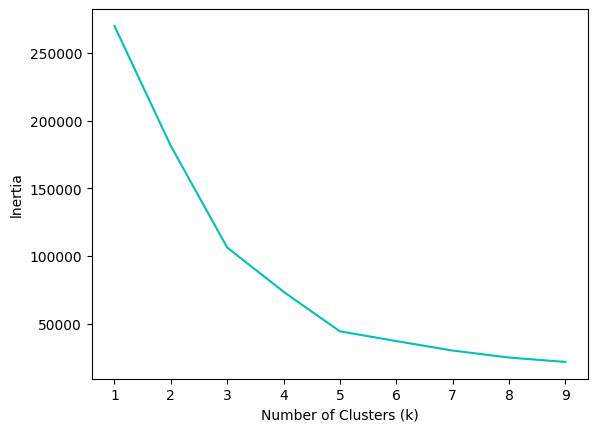

In [47]:
# elbow_method를 이용하여 클러스터의 개수를 정해보세요. 
num_clusters = list(range(1,10))
inertias = []
for i in num_clusters:
    model = KMeans(n_clusters = i)
    model.fit(data)
    inertias.append(model.inertia_) # 지표확인 시 inertia_ 값

# 그래프
plt.plot(num_clusters, inertias, '-c')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("lnertia")
plt.show()


#### 업데이트

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


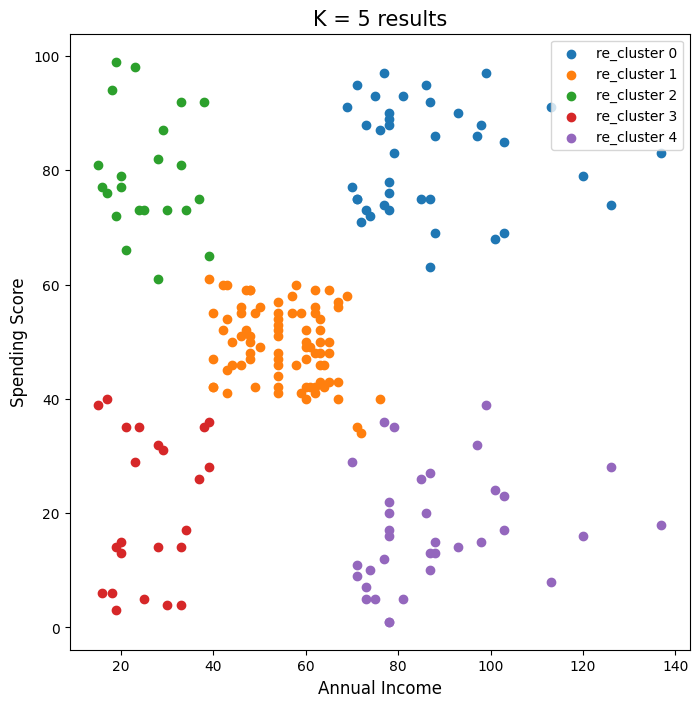

In [53]:
# 위의 elbow method 결과를 참고하여 다시한번 클러스터링하고, 시각화하세요
k=5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 19)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['re_cluster'] = model.fit_predict(data_scale)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['re_cluster'] == i, 'Annual Income (k$)'], df.loc[df['re_cluster'] == i, 'Spending Score (1-100)'], 
                label = 're_cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


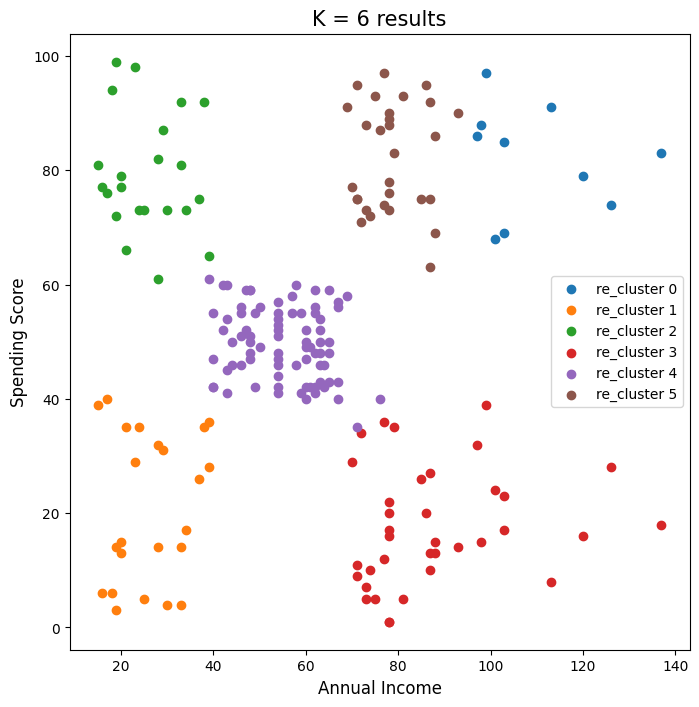

In [55]:
# 위의 elbow method 결과를 참고하여 다시한번 클러스터링하고, 시각화하세요
k=6

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 19)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['re_cluster'] = model.fit_predict(data_scale)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['re_cluster'] == i, 'Annual Income (k$)'], df.loc[df['re_cluster'] == i, 'Spending Score (1-100)'], 
                label = 're_cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

####평가


In [95]:
from sklearn.metrics import silhouette_score # silhouette_score : 실루엣 지표
 
silhouette_score(data, kmeans.labels_, metric='euclidean') 

-0.021640072650628204

In [94]:
from sklearn.metrics import silhouette_samples # 각각의 샘플의 실루엣계수 구해주는 라이브러리

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(data, df['re_cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(data, df['re_cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

df.head(3)

silhouette_samples( ) return 값의 shape (200,)
붓꽃 데이터셋 Silhouette Analysis Score:0.539


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,re_cluster,silhouette_coeff
0,1,Male,19,15,39,0,1,0.414415
1,2,Male,21,15,81,0,2,0.694725
2,3,Female,20,16,6,5,1,0.639701


In [97]:
df.groupby('re_cluster').mean()['silhouette_coeff']
# 0,3번(숫자가 낮음)이 경계가 불분명한 것을 알 수 있음

<ipython-input-97-a3e5f8db97e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('re_cluster').mean()['silhouette_coeff']


re_cluster
0    0.329535
1    0.510954
2    0.594082
3    0.481367
4    0.588264
5    0.530036
Name: silhouette_coeff, dtype: float64

In [96]:
df.groupby('re_cluster')['silhouette_coeff'].mean()

re_cluster
0    0.329535
1    0.510954
2    0.594082
3    0.481367
4    0.588264
5    0.530036
Name: silhouette_coeff, dtype: float64

###모든 데이터 사용


In [68]:
train = df.copy()
train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,re_cluster
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,5,0
196,197,Female,45,126,28,6,3
197,198,Male,32,126,74,5,0
198,199,Male,32,137,18,6,3


In [69]:
train_data = train[['Gender',	'Age'	,'Annual Income (k$)',	'Spending Score (1-100)']]
train_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [84]:
train_data['Gender'].replace('Male',0, inplace = True)
train_data['Gender'].replace('Female',1, inplace = True)

<ipython-input-84-f8a5dccb8d46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Gender'].replace('Male',0, inplace = True)
<ipython-input-84-f8a5dccb8d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Gender'].replace('Female',1, inplace = True)


In [85]:
train_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [86]:
# 정규화 
train_scale = MinMaxScaler().fit_transform(train_data)
train_scale

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

In [88]:
# 정규화된 데이터에 학습
kmeans.fit(train_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=19)

In [90]:
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
train_data['cluster'] = model.fit_predict(train_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-90-f706bc0d9d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cluster'] = model.fit_predict(train_scale)


In [91]:
train_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,5
3,1,23,16,77,5
4,1,31,17,40,5
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,4
197,0,32,126,74,0
198,0,32,137,18,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

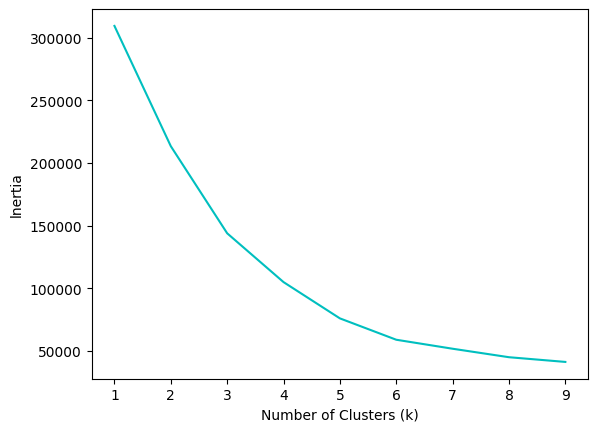

In [98]:
# elbow_method를 이용하여 클러스터의 개수를 정해보세요. 
num_clusters = list(range(1,10))
inertias = []
for i in num_clusters:
    model = KMeans(n_clusters = i)
    model.fit(train_data)
    inertias.append(model.inertia_) # 지표확인 시 inertia_ 값

# 그래프
plt.plot(num_clusters, inertias, '-c')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("lnertia")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


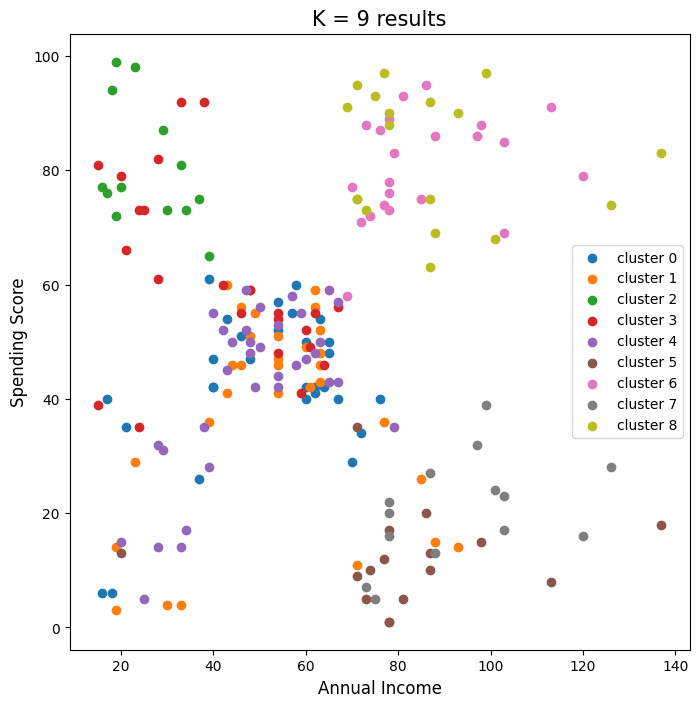

In [104]:
# 위의 elbow method 결과를 참고하여 다시한번 클러스터링하고, 시각화하세요
k=9

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 19)

# 정규화된 데이터에 학습
model.fit(train_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
train_data['cluster'] = model.fit_predict(train_scale)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(train_data.loc[train_data['cluster'] == i, 'Annual Income (k$)'], train_data.loc[train_data['cluster'] == i, 'Spending Score (1-100)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

In [105]:
from sklearn.metrics import silhouette_samples # 각각의 샘플의 실루엣계수 구해주는 라이브러리

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(train_data, train_data['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
train_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(train_data, train_data['cluster'])
print('데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

train_data.head(3)

silhouette_samples( ) return 값의 shape (200,)
데이터셋 Silhouette Analysis Score:0.028


,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,re_cluster,silhouette_coeff
0,0,19,15,39,3,3,-0.004658
1,0,21,15,81,3,3,-0.561356
2,1,20,16,6,0,7,0.089023


In [106]:
train_data.groupby('cluster').mean()['silhouette_coeff']
# 1번빼고 전부 경계가 불분명한 것을 알 수 있음

cluster
0    0.131638
1   -0.159106
2    0.422598
3   -0.240888
4    0.123433
5   -0.015944
6    0.120807
7    0.169825
8   -0.120969
Name: silhouette_coeff, dtype: float64